Implement a linear regression model to predict the prices of house based on their square footage and the no of bedroom and bathroom.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [44]:
df=pd.read_csv('/content/all_perth_310121.csv')

In [45]:
df.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33656 non-null  object 
 1   SUBURB            33656 non-null  object 
 2   PRICE             33656 non-null  int64  
 3   BEDROOMS          33656 non-null  int64  
 4   BATHROOMS         33656 non-null  int64  
 5   GARAGE            31178 non-null  float64
 6   LAND_AREA         33656 non-null  int64  
 7   FLOOR_AREA        33656 non-null  int64  
 8   BUILD_YEAR        30501 non-null  float64
 9   CBD_DIST          33656 non-null  int64  
 10  NEAREST_STN       33656 non-null  object 
 11  NEAREST_STN_DIST  33656 non-null  int64  
 12  DATE_SOLD         33656 non-null  object 
 13  POSTCODE          33656 non-null  int64  
 14  LATITUDE          33656 non-null  float64
 15  LONGITUDE         33656 non-null  float64
 16  NEAREST_SCH       33656 non-null  object

In [47]:
df.describe()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
count,3.365600e+04,33656.000000,33656.000000,31178.000000,33656.000000,33656.000000,30501.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,22704.000000
mean,6.370720e+05,3.659110,1.823063,2.199917,2740.644016,183.501545,1989.706436,19777.374465,4523.371494,6089.420074,-31.960664,115.879265,1.815268,72.672569
std,3.558256e+05,0.752038,0.587427,1.365225,16693.513215,72.102982,20.964330,11364.415413,4495.064024,62.167921,0.177780,0.118137,1.746000,40.639795
min,5.100000e+04,1.000000,1.000000,1.000000,61.000000,1.000000,1868.000000,681.000000,46.000000,6003.000000,-32.472979,115.582730,0.070912,1.000000
25%,4.100000e+05,3.000000,1.000000,2.000000,503.000000,130.000000,1978.000000,11200.000000,1800.000000,6050.000000,-32.068437,115.789763,0.880568,39.000000
50%,5.355000e+05,4.000000,2.000000,2.000000,682.000000,172.000000,1995.000000,17500.000000,3200.000000,6069.000000,-31.933231,115.854198,1.345520,68.000000
75%,7.600000e+05,4.000000,2.000000,2.000000,838.000000,222.250000,2005.000000,26600.000000,5300.000000,6150.000000,-31.843818,115.970722,2.097225,105.000000
max,2.440000e+06,10.000000,16.000000,99.000000,999999.000000,870.000000,2017.000000,59800.000000,35500.000000,6558.000000,-31.457450,116.343201,23.254372,139.000000


In [48]:
# There are 80 inputs in the dataframe. But we only require LotArea , Bedroom , bathroom and sale price

In [49]:
new_df=df[['FLOOR_AREA','BEDROOMS','BATHROOMS','PRICE']]
x=df[['FLOOR_AREA','BEDROOMS','BATHROOMS']]
y=df[['PRICE']]

In [50]:
# Splitting into train and test datasets
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

Analysing x and y datasets


In [51]:
x_train.describe()


,FLOOR_AREA,BEDROOMS,BATHROOMS
count,26924.000000,26924.000000,26924.000000
mean,183.684705,3.663646,1.822389
std,72.314352,0.753897,0.588259
min,1.000000,1.000000,1.000000
25%,130.000000,3.000000,1.000000
50%,173.000000,4.000000,2.000000
75%,223.000000,4.000000,2.000000
max,870.000000,10.000000,16.000000


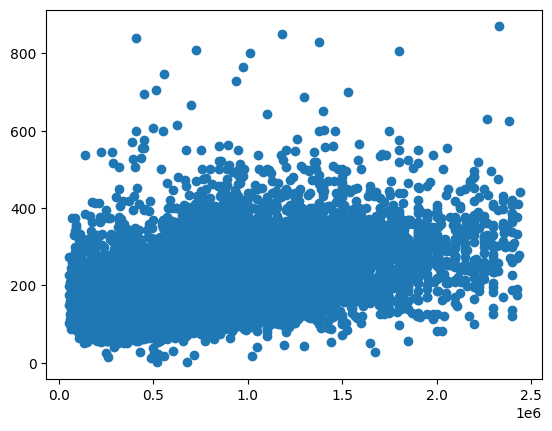

In [52]:

plt.scatter(y_train.PRICE,x_train.FLOOR_AREA)

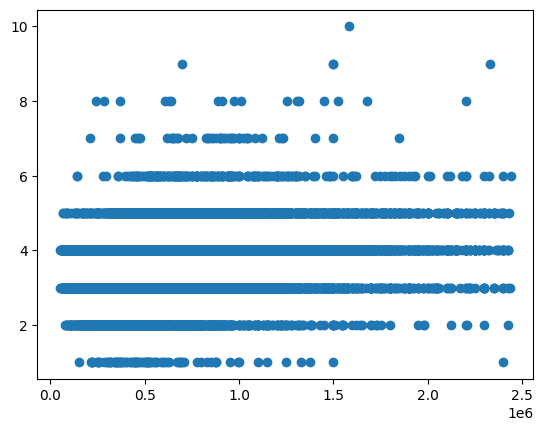

In [53]:
plt.scatter(y_train.PRICE,x_train.BEDROOMS)

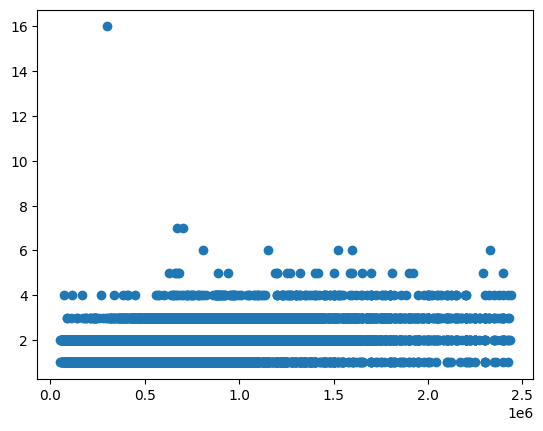

In [54]:
plt.scatter(y_train.PRICE,x_train.BATHROOMS)

In [55]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [66]:
# Creating Linear Regression model
from sklearn.linear_model import LinearRegression
model=LinearRegression()


In [67]:
model.fit(x_train_scaled,y_train)

LinearRegression()

In [68]:
model.score(x_test_scaled,y_test)

0.32301764820857737

In [73]:
predicted_values=model.predict(y_test)

We got only 32% accuracy as the dataset is not proper for linear regression models.


In [69]:
# Lets check why this dataset is improper for prediction
from sklearn.metrics import mean_absolute_error

In [74]:
error =mean_absolute_error(y_test,predicted_values)

In [75]:
print(error)

205012.85760183007


The Mean Absolute Error is too high for this dataset .... Thus prediction through Linear Regression is Bad.